In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [116]:
df = pd.read_csv("datasets/mental_health_remote_workers.csv")
print(df.head())

   Employee_ID    Name  Age             Gender    Country         Job_Role  \
0            1  User_1   28             Female     Canada      QA Engineer   
1            2  User_2   41  Prefer not to say  Australia  DevOps Engineer   
2            3  User_3   36               Male    Germany   UI/UX Designer   
3            4  User_4   32  Prefer not to say    Germany  Product Manager   
4            5  User_5   29               Male         UK  DevOps Engineer   

   Experience_Years Work_Mode  Hours_Worked_Per_Week  Productivity_Score  \
0               5.4    Onsite                   45.4                 6.6   
1              10.5    Remote                   40.4                 8.4   
2              11.9    Hybrid                   43.6                 6.6   
3              15.6    Hybrid                   41.3                 9.0   
4               1.8    Hybrid                   42.5                 6.9   

  Mental_Health_Status  Burnout_Score  Sleep_Hours_Per_Day Exercise_Freque

In [117]:
print(df.isna().any())

Employee_ID                         False
Name                                False
Age                                 False
Gender                              False
Country                             False
Job_Role                            False
Experience_Years                    False
Work_Mode                           False
Hours_Worked_Per_Week               False
Productivity_Score                  False
Mental_Health_Status                False
Burnout_Score                       False
Sleep_Hours_Per_Day                 False
Exercise_Frequency                  False
Work_Life_Balance_Rating            False
Has_Access_To_Therapist             False
Willing_To_Return_Onsite            False
Remote_Setup_Satisfaction           False
Internet_Issues_Frequency           False
Team_Communication_Effectiveness    False
dtype: bool


In [118]:
print(df['Country'].unique())
print(df['Job_Role'].unique())
print(df['Work_Mode'].unique())
print(df['Mental_Health_Status'].unique())
print(df['Exercise_Frequency'].unique())
print(df['Has_Access_To_Therapist'].unique())
print(df['Willing_To_Return_Onsite'].unique())
print(df['Internet_Issues_Frequency'].unique())


['Canada' 'Australia' 'Germany' 'UK' 'Brazil' 'India' 'USA']
['QA Engineer' 'DevOps Engineer' 'UI/UX Designer' 'Product Manager'
 'Data Scientist' 'Developer']
['Onsite' 'Remote' 'Hybrid']
['Poor' 'Good' 'Moderate']
['Rarely' 'Daily' 'Never' '2-3x/Week']
[ True False]
[False  True]
['Sometimes' 'Often' 'Never']


In [119]:
"""
Gender
Country (drop)
Job_Role
Work_Mode
Mental_Health_Status
Exercise_Frequency
Has_Access_To_Therapist
Willing_To_Return_Onsite
Internet_Issues_Frequency
"""

df['Gender'] = df['Gender'].map({'Male': 0, 
                                 'Female': 1,
                                 'Non-binary': 3,
                                 'Prefer not to say': 4})

df['Country'] = df['Country'].map({'Canada': 0,
                                   'Australia': 1,
                                   'Germany': 2,
                                   'UK': 3,
                                   'Brazil': 4,
                                   'India': 5,
                                    'USA': 6,
                                    })
"""
['Canada' 'Australia' 'Germany' 'UK' 'Brazil' 'India' 'USA']
['QA Engineer' 'DevOps Engineer' 'UI/UX Designer' 'Product Manager'
 'Data Scientist' 'Developer']
"""
df['Job_Role'] = df['Job_Role'].map({'QA Engineer': 0,
                                     'DevOps Engineer': 1,
                                     'UI/UX Designer': 2,
                                     'Product Manager': 3,
                                     'Data Scientist': 4,
                                     'Developer': 5})

df['Work_Mode'] = df['Work_Mode'].map({'Onsite': 0,
                                       'Remote': 1,
                                       'Hybrid': 2})

df['Mental_Health_Status'] = df['Mental_Health_Status'].map({'Poor': 0,
                                                             'Good': 1,
                                                             'Moderate': 2})
#['Rarely' 'Daily' 'Never' '2-3x/Week']
df['Exercise_Frequency'] = df['Exercise_Frequency'].map({'Rarely': 0,
                                                         'Daily': 1,
                                                         'Never': 2,
                                                         '2-3x/Week': 3})

df['Has_Access_To_Therapist'] = df['Has_Access_To_Therapist'].map({True: 0, False: 1})

df['Willing_To_Return_Onsite'] = df['Willing_To_Return_Onsite'].map({True: 0, False: 1})

df['Internet_Issues_Frequency'] = df['Internet_Issues_Frequency'].map({'Sometimes': 0,
                                                                       'Often': 1,
                                                                       'Never': 2})

In [120]:
print(df.head())

   Employee_ID    Name  Age  Gender  Country  Job_Role  Experience_Years  \
0            1  User_1   28       1        0         0               5.4   
1            2  User_2   41       4        1         1              10.5   
2            3  User_3   36       0        2         2              11.9   
3            4  User_4   32       4        2         3              15.6   
4            5  User_5   29       0        3         1               1.8   

   Work_Mode  Hours_Worked_Per_Week  Productivity_Score  Mental_Health_Status  \
0          0                   45.4                 6.6                     0   
1          1                   40.4                 8.4                     1   
2          2                   43.6                 6.6                     1   
3          2                   41.3                 9.0                     2   
4          2                   42.5                 6.9                     0   

   Burnout_Score  Sleep_Hours_Per_Day  Exercise_Frequenc

In [121]:
df = df.drop(['Name', 'Employee_ID'],axis=1)
print(df.head())

   Age  Gender  Country  Job_Role  Experience_Years  Work_Mode  \
0   28       1        0         0               5.4          0   
1   41       4        1         1              10.5          1   
2   36       0        2         2              11.9          2   
3   32       4        2         3              15.6          2   
4   29       0        3         1               1.8          2   

   Hours_Worked_Per_Week  Productivity_Score  Mental_Health_Status  \
0                   45.4                 6.6                     0   
1                   40.4                 8.4                     1   
2                   43.6                 6.6                     1   
3                   41.3                 9.0                     2   
4                   42.5                 6.9                     0   

   Burnout_Score  Sleep_Hours_Per_Day  Exercise_Frequency  \
0             44                  5.7                   0   
1             58                  5.1                   1   

In [125]:
X = df.drop('Productivity_Score', axis=1)
y = df['Productivity_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# alphas = [0.01,0.1,1.0,10.0,100.0,1000.0]
# scores = []
# for alpha in alphas:
#     ridge = Ridge(alpha=alpha)
#     ridge.fit(X_train, y_train)
#     scores.append(ridge.score(X_train, y_train))
#     scores.append(ridge.score(X_test, y_test))
# print(scores)
# print(max(scores))
# print(scores.index(max(scores)))
# print((alphas[0]))

In [126]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


83    9.3
53    5.0
70    8.6
45    5.4
44    4.3
39    3.9
22    6.6
80    3.3
10    8.3
0     6.6
Name: Productivity_Score, dtype: float64
[6.39512667 7.23213124 5.62769721 5.4509041  5.42413108 7.72085137
 6.04039747 7.88316483 5.57627325 5.85804235]
Accuracy: -362.2575521531319 %
Error: 462.2575521531319 %


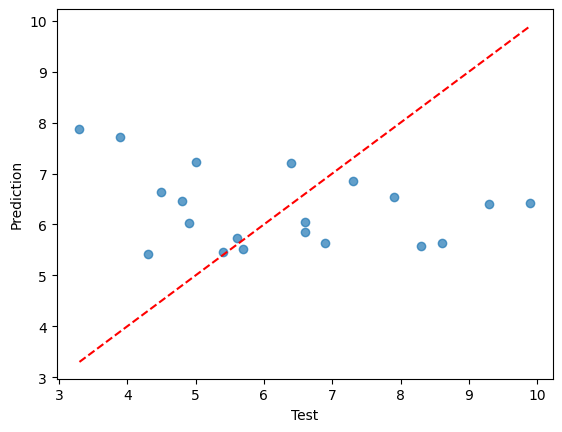

In [127]:
# ridge =Ridge(alpha=0.01)
# ridge.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(y_test[0:10])
print(y_pred[0:10])

mse= mean_squared_error(y_test, y_pred)

print('Accuracy:', 100 - (mse * 100), "%")
print('Error:', mse * 100, "%")

plt.scatter(y_test, y_pred, alpha=0.7)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Ideal (y = x)")
plt.xlabel('Test')
plt.ylabel('Prediction')
plt.show()